The table below report on the presence of functional activation by brain region.

In [1]:
import pandas as pd
df = pd.read_csv('active_regions.csv')
df

,Unnamed: 0,Region,FSL IEEE,SPM IEEE,AFNI IEEE,FSL MCA1,FSL MCA2,FSL MCA3,SPM MCA1,SPM MCA2,SPM MCA3,AFNI MCA1,AFNI MCA2,AFNI MCA3
0,1,L_V1_ROI,1,0,1,1,1,1,0,0,0,1,1,1
1,2,R_V1_ROI,1,0,1,1,1,1,0,0,0,1,1,1
2,3,L_MST_ROI,0,0,0,0,0,0,0,0,0,0,0,0
3,4,R_MST_ROI,0,0,0,0,0,0,0,0,0,0,0,0
4,5,L_V6_ROI,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,R_PI_ROI,0,0,0,0,0,0,0,0,0,0,0,0
356,357,L_a32pr_ROI,1,1,1,1,1,1,1,1,1,1,1,1
357,358,R_a32pr_ROI,0,1,1,0,0,0,1,1,1,1,1,1
358,359,L_p24_ROI,1,1,1,1,1,1,1,1,1,1,1,1


Definitions:
* A region R is unstable for a tool pair (T1, T2) iif activation(T1 IEEE, R) != activation(T2 IEEE, R)
* A region R is MCA-unstable for a tool pair (T1, T2) iif $\exists$ (i, j) s.t. activation(T1 MCA i, R) != activation(T1 MCA j, R) or activation (T2 MCA i, R) != activation(T2 MCA j, R) 

In [2]:
tool_pairs = [('FSL', 'SPM'), ('FSL', 'AFNI'), ('AFNI', 'SPM')]
for tp in tool_pairs:
    tool1, tool2 = tp
    tool_pair = f'{tool1}-{tool2}'
    df[f'{tool_pair} unstable'] = (df[f'{tool1} IEEE'].ne(df[f'{tool2} IEEE']))
    df[f'{tool_pair} MCA unstable'] = (df[f'{tool1} MCA1'].ne(df[f'{tool1} MCA2'])) | (df[f'{tool1} MCA1'].ne(df[f'{tool1} MCA3'])) | (df[f'{tool1} MCA2'].ne(df[f'{tool1} MCA3']))\
    | (df[f'{tool2} MCA1'].ne(df[f'{tool2} MCA2'])) | (df[f'{tool2} MCA1'].ne(df[f'{tool2} MCA3'])) | (df[f'{tool2} MCA2'].ne(df[f'{tool2} MCA3']))    


In [3]:
df

,Unnamed: 0,Region,FSL IEEE,SPM IEEE,AFNI IEEE,FSL MCA1,FSL MCA2,FSL MCA3,SPM MCA1,SPM MCA2,SPM MCA3,AFNI MCA1,AFNI MCA2,AFNI MCA3,FSL-SPM unstable,FSL-SPM MCA unstable,FSL-AFNI unstable,FSL-AFNI MCA unstable,AFNI-SPM unstable,AFNI-SPM MCA unstable
0,1,L_V1_ROI,1,0,1,1,1,1,0,0,0,1,1,1,True,False,False,False,True,False
1,2,R_V1_ROI,1,0,1,1,1,1,0,0,0,1,1,1,True,False,False,False,True,False
2,3,L_MST_ROI,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False
3,4,R_MST_ROI,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False
4,5,L_V6_ROI,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,R_PI_ROI,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False
356,357,L_a32pr_ROI,1,1,1,1,1,1,1,1,1,1,1,1,False,False,False,False,False,False
357,358,R_a32pr_ROI,0,1,1,0,0,0,1,1,1,1,1,1,True,False,True,False,False,False
358,359,L_p24_ROI,1,1,1,1,1,1,1,1,1,1,1,1,False,False,False,False,False,False


In [4]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

def confusion_matrix(tool1, tool2):
    
    tool_pair = f'{tool1}-{tool2}'
    confusion = np.zeros((2,2))
    tn = len(df[(df[f'{tool_pair} unstable'] == 0) & (df[f'{tool_pair} MCA unstable'] == 0)])
    tp = len(df[(df[f'{tool_pair} unstable'] == 1) & (df[f'{tool_pair} MCA unstable'] == 1)])
    fn = len(df[(df[f'{tool_pair} unstable'] == 1) & (df[f'{tool_pair} MCA unstable'] == 0)])
    fp = len(df[(df[f'{tool_pair} unstable'] == 0) & (df[f'{tool_pair} MCA unstable'] == 1)])
    n = tn + tp + fn + fp
    confusion[0][0] = tn
    confusion[1][1] = tp
    confusion[0][1] = fn
    confusion[1][0] = fp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2* precision*recall/(precision + recall)
    accuracy = (tp + tn)/n
    positives = len(df[(df[f'{tool_pair} unstable'] == 1)])
    negatives = len(df[(df[f'{tool_pair} unstable'] == 0)])
    sensitivity = tp / positives
    specificity = tn/n
    y1 = df[f'{tool_pair} unstable']
    y2 = df[f'{tool_pair} MCA unstable']
    kappa = cohen_kappa_score(y1, y2)
    
    return accuracy, kappa, f1, sensitivity, specificity, precision, recall, confusion

Average accuracy: 0.7425925925925926
Average kappa: 0.1681757695251036


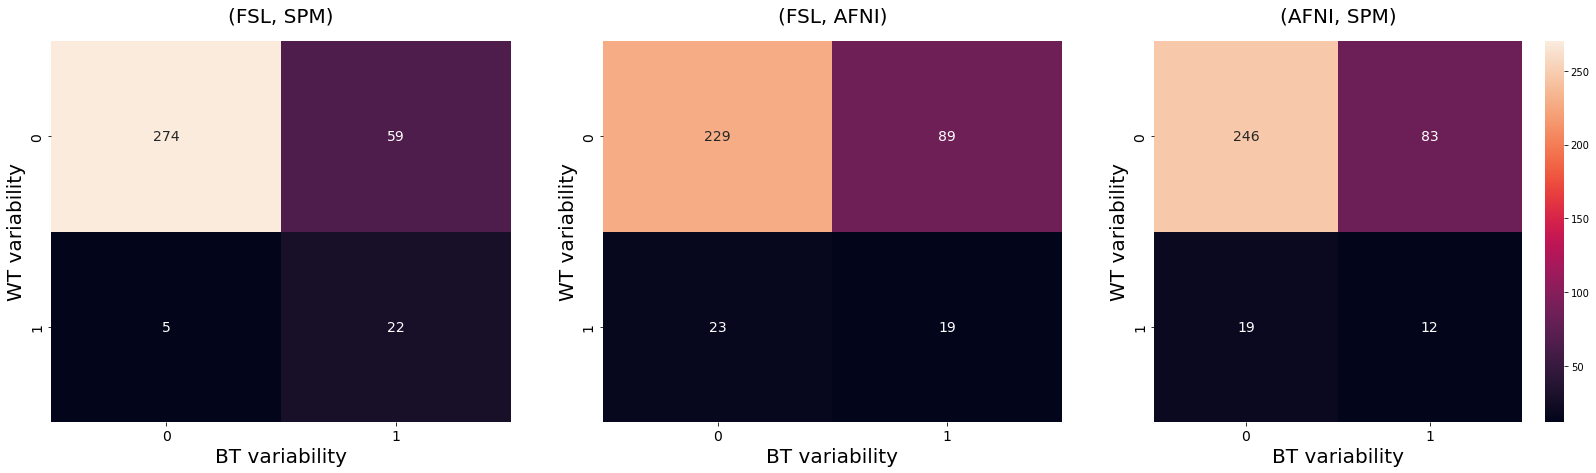

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (28, 7)
fig, axes = plt.subplots(1, 3)
confusions = []
accuracies = []
kappas = []
for i, tool_pair in enumerate(tool_pairs):
    accuracy, kappa, f1, sensitivity, specificity, precision, recall, confusion = confusion_matrix(*tool_pair)
    confusions += [confusion]
    accuracies += [accuracy]
    kappas += [kappa]
    cbar = True if i == 2 else False
    sns.heatmap(confusion, ax=axes[i], annot=True, vmax=270, fmt='g', cbar=cbar, annot_kws={"size":14})
    title_ = "({}, {})".format(tool_pair[0].strip("''"), tool_pair[1].strip("''"))
    axes[i].set_title(title_, fontsize=20, pad=20)
    axes[i].set_xlabel('BT variability', fontsize=20)
    axes[i].set_ylabel('WT variability', fontsize=20)
    axes[i].tick_params(labelsize=14)
    
plt.savefig('../paper/figures/dice_analysis-plot.png', bbox_inches='tight')
print(f'Average accuracy: {sum(accuracies)/len(accuracies)}')
print(f'Average kappa: {sum(kappas)/len(accuracies)}')

In [30]:
# Chance precision
positives = sum([ x[0][1]+x[1][1] for x in confusions])
total = 360*3
ratio = 0.5

In [31]:
tp = positives*ratio

In [32]:
fp = (total-positives)*ratio

In [33]:
negatives = sum([ x[0][0]+x[1][0] for x in confusions])

In [34]:
negatives

796.0

In [35]:
fn = positives*0.5

In [36]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2* precision*recall/(precision + recall)

In [37]:
f1

0.3446601941747573

In [38]:
recall

0.5

In [39]:
precision

0.26296296296296295

In [40]:
tn=negatives*ratio

In [41]:
accuracy = (tp + tn)/negatives
accuracy


0.678391959798995